In [1]:
import os
import shutil 

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import skimage.transform as trans
from PIL import Image, ImageEnhance 
from skimage.io import imread, imsave
from sklearn.model_selection import train_test_split

from preprocess import extract_train, extract_test, preprocess_train, preprocess_test

import warnings
warnings.filterwarnings("ignore")

# (1) Extract from LIDC_IDRI raw dataset

In [2]:
# 1.1: partition patient IDs into train test split
start = 1
end = len([d for d in os.listdir("data/raw_data/LIDC-IDRI/") if d.startswith("LIDC-IDRI")])
id_nums = ['0'*(4-len(n))+n for n in [str(i) for i in range(start, end+1)]]
ids = [f"LIDC-IDRI/LIDC-IDRI-{id_num}" for id_num in id_nums]

train_ids, test_ids = train_test_split(
    ids,
    test_size=.2,
    random_state=26
)

In [3]:
# 1.2: clear out old extracted training data
if os.path.exists('data/extracted_train'):
    shutil.rmtree('data/extracted_train')

In [4]:
# 1.3: extract train from raw
extract_train('data/raw_data/', 'data/extracted_train', train_ids)

Extracting: 2/730, Total images extracted: 0
No XML found for data/raw_data/LIDC-IDRI/LIDC-IDRI-0686/01-01-2000-NA-CT CHEST WO CONTRAST-09860/2.000000-NA-82004

Extracting: 3/730, Total images extracted: 0
No XML found for data/raw_data/LIDC-IDRI/LIDC-IDRI-0656/01-01-2000-NA-CT CHEST O CONTR-51770/2.000000-NA-47014

Extracting: 43/730, Total images extracted: 376
No XML found for data/raw_data/LIDC-IDRI/LIDC-IDRI-0600/01-01-2000-NA-CT CHEST WO CONTRAST-13528/2.000000-NA-19680

Extracting: 44/730, Total images extracted: 376
Error processing LIDC-IDRI/LIDC-IDRI-0826
Extracting: 65/730, Total images extracted: 564
No XML found for data/raw_data/LIDC-IDRI/LIDC-IDRI-0650/01-01-2000-NA-CT CHEST O CONTR-98533/2.000000-NA-34609

Extracting: 73/730, Total images extracted: 659
Error processing LIDC-IDRI/LIDC-IDRI-0840
Extracting: 78/730, Total images extracted: 717
Error processing LIDC-IDRI/LIDC-IDRI-0823
Extracting: 82/730, Total images extracted: 720
Error processing LIDC-IDRI/LIDC-IDRI-082

Extracting: 433/730, Total images extracted: 2912
No XML found for data/raw_data/LIDC-IDRI/LIDC-IDRI-0524/01-01-2000-NA-NA-93738/1905.000000-NLST TLC VOL B30F-20378

Extracting: 436/730, Total images extracted: 2927
Error processing LIDC-IDRI/LIDC-IDRI-0119
Extracting: 441/730, Total images extracted: 2968
Error processing LIDC-IDRI/LIDC-IDRI-0101
Extracting: 448/730, Total images extracted: 3049
No XML found for data/raw_data/LIDC-IDRI/LIDC-IDRI-0455/01-01-2000-NA-CT CHEST O CONTR-29059/2.000000-NA-61235

Extracting: 475/730, Total images extracted: 3240
No XML found for data/raw_data/LIDC-IDRI/LIDC-IDRI-0723/01-01-2000-NA-CT CHEST WO CONTRAST-89554/2.000000-NA-95949

Extracting: 494/730, Total images extracted: 3381
No XML found for data/raw_data/LIDC-IDRI/LIDC-IDRI-0079/01-01-2000-NA-NA-37490/3278.000000-NA-05159

Extracting: 511/730, Total images extracted: 3474
No XML found for data/raw_data/LIDC-IDRI/LIDC-IDRI-0566/01-01-2000-NA-NA-63215/3000008.000000-NA-95628

Extracting: 519/7

In [3]:
# 1.4: clear out old extracted test data
if os.path.exists('data/extracted_test'):
    shutil.rmtree('data/extracted_test')

In [5]:
# 1.5: extract test from raw
extract_test('data/raw_data/', 'data/extracted_test', test_ids)

Extracting: 5/183, Total images extracted: 3
No XML found for data/raw_data/LIDC-IDRI/LIDC-IDRI-0408/01-01-2000-NA-CT CHEST O CONTR-89975/2.000000-NA-98037

Extracting: 9/183, Total images extracted: 5
No XML found for data/raw_data/LIDC-IDRI/LIDC-IDRI-0154/01-01-2000-NA-NA-34879/3112.000000-NA-40121

Extracting: 11/183, Total images extracted: 6
No XML found for data/raw_data/LIDC-IDRI/LIDC-IDRI-0689/01-01-2000-NA-CT CHEST O CONTR-84533/2.000000-NA-30842

Extracting: 12/183, Total images extracted: 6
No XML found for data/raw_data/LIDC-IDRI/LIDC-IDRI-0447/01-01-2000-NA-CT GUIDED LUNG B-56357/2.000000-NA-08059

Extracting: 14/183, Total images extracted: 6
Error processing LIDC-IDRI/LIDC-IDRI-0819
Extracting: 23/183, Total images extracted: 11
Error processing LIDC-IDRI/LIDC-IDRI-0836
Extracting: 24/183, Total images extracted: 11
No XML found for data/raw_data/LIDC-IDRI/LIDC-IDRI-0774/01-01-2000-NA-CT CHEST O CONTR-28182/2.000000-NA-98197

Extracting: 29/183, Total images extracted: 1

# (2) Preprocess

In [7]:
# 2.1: clear out old train data
if os.path.exists('data/train'):
    shutil.rmtree('data/train')

In [8]:
# 2.2 process train
preprocess_train('data/extracted_train', 'data/train')

Empty lung field returned for image 37. Skipping
Empty lung field returned for image 126. Skipping
Empty lung field returned for image 152. Skipping
Empty lung field returned for image 1301. Skipping
Empty lung field returned for image 1302. Skipping
Empty lung field returned for image 1303. Skipping
Empty lung field returned for image 1304. Skipping
Empty lung field returned for image 1305. Skipping
Empty lung field returned for image 1306. Skipping
Empty lung field returned for image 1307. Skipping
Empty lung field returned for image 1308. Skipping
Empty lung field returned for image 1309. Skipping
Empty lung field returned for image 1310. Skipping
Empty lung field returned for image 1312. Skipping
Empty lung field returned for image 1314. Skipping
Empty lung field returned for image 1315. Skipping
Empty lung field returned for image 4051. Skipping
Empty lung field returned for image 4052. Skipping
Empty lung field returned for image 4270. Skipping
Processing...4901/4901
Complete.


In [9]:
# 2.3: clear out old test data
if os.path.exists('data/test'):
    shutil.rmtree('data/test')

In [10]:
# 2.4 process test
preprocess_test('data/extracted_test', 'data/test')

Empty lung field returned for image 43. Skipping
Processing...123/123
Complete.


3679


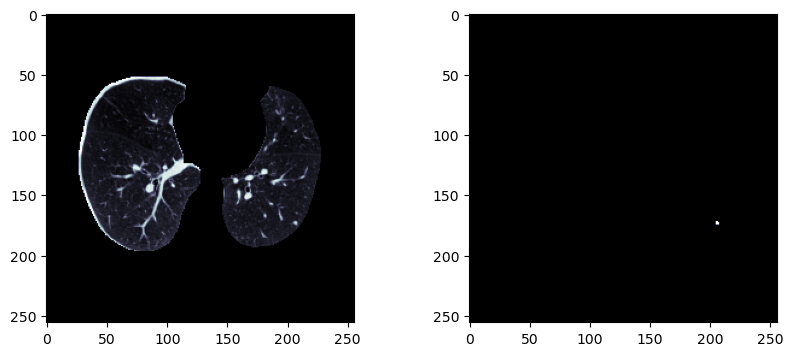

In [11]:
# 2.3: visualize training

idx = np.random.randint(len(os.listdir('data/train/image')))
# idx = 295
img = imread(f'data/train/image/{idx}.tif') 
mask = imread(f'data/train/label/{idx}.tif') 
print(idx)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(np.array(img), cmap='bone')
axs[1].imshow(np.array(mask), cmap='bone')
plt.show()


1


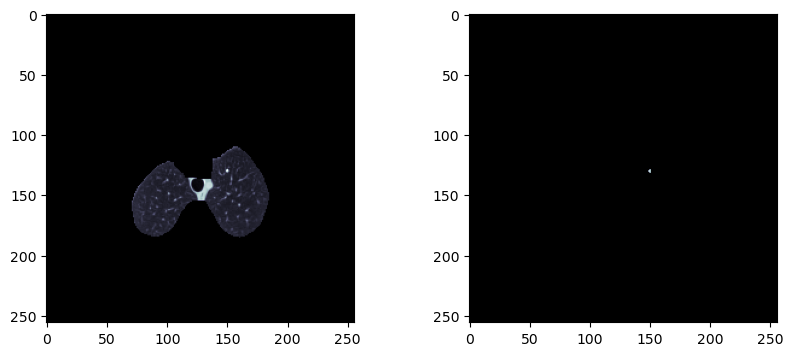

In [12]:
# 2.3: visualize test

# idx = np.random.randint(len(os.listdir('data/test/image')))
idx = 1
img = imread(f'data/test/image/{idx}.tif') 
mask = imread(f'data/test/label/{idx}.tif') 
print(idx)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(np.array(img), cmap='bone')
axs[1].imshow(np.array(mask), cmap='bone')
plt.show()


# (3) Remove bad training images

*Note: all bad test images fixed manually. Most bad training images fixed manually, but some remain to be removed*

Number of bad images: 339
2283.tif


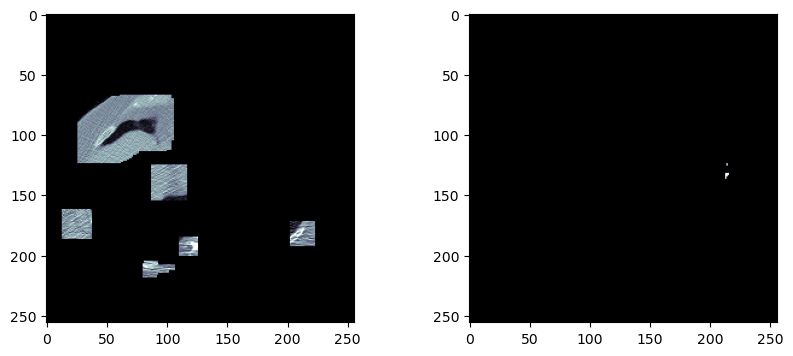

In [13]:
bad_ims = []
for idx in os.listdir('data/train/image'):
    im = imread(f'data/train/image/{idx}') 
    # remove if contrast issue after preprocessing
    if len(np.unique(np.clip(im, 0, 100))) < 5:
        bad_ims.append(idx)
    # remove if < 50% of mask in image (got past manual fixes)
    else:
        mask = imread(f'data/train/label/{idx}') 
        mask_pixels = im.flatten()[np.argwhere(mask.flatten()>0)]
        if np.count_nonzero(mask_pixels) < (5/10)*mask_pixels.size:
            bad_ims.append(idx)

print(f"Number of bad images: {len(bad_ims)}")

# visualize bad images
bad_idx = bad_ims[np.random.randint(len(bad_ims))]
bad_img = imread(f'data/train/image/{bad_idx}') 
bad_mask = imread(f'data/train/label/{bad_idx}') 

print(bad_idx)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(np.array(bad_img), cmap='bone')
axs[1].imshow(np.array(bad_mask), cmap='bone')
plt.show()

In [14]:
for bad_im in bad_ims:
    os.remove(f'data/train/image/{bad_im}')
    os.remove(f'data/train/label/{bad_im}')

# (4) Create Validation split

In [15]:
if os.path.exists('data/val'):
    shutil.rmtree('data/val')

In [16]:
os.mkdir('data/val')
os.mkdir('data/val/image')
os.mkdir('data/val/label')

sorted_idxs = sorted(os.listdir('data/train/image'), key=lambda x: int(x[:-4]))
n = len(sorted_idxs)
for idx in sorted_idxs[n-500:]:
    img = imread(f'data/train/image/{idx}')
    mask = imread(f'data/train/label/{idx}')
    imsave(f'data/val/image/{idx}', im)
    imsave(f'data/val/label/{idx}', mask)
    os.remove(f'data/train/image/{idx}')
    os.remove(f'data/train/label/{idx}')